In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

0


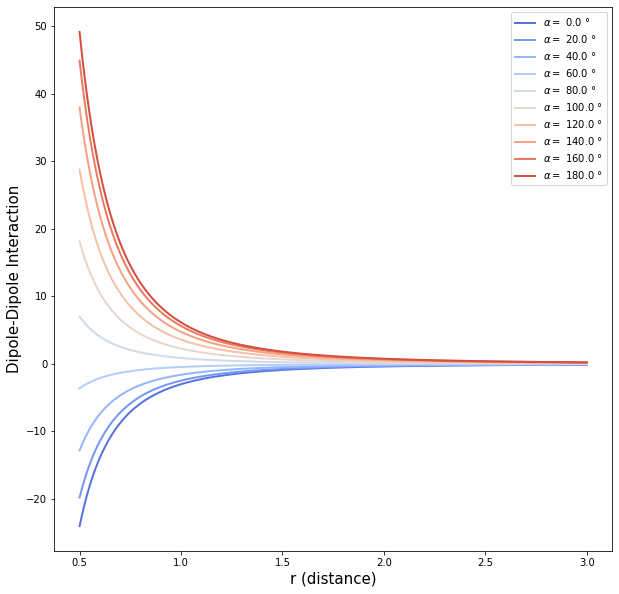

In [4]:

sns.set_palette('coolwarm',10)
def dipole_potential(R,alpha,beta):
    U = -(3*np.cos(alpha)*np.cos(beta) - np.abs(alpha-beta))/np.power(R,3) 
    return U 

# potential simplified as we assume that r=(1,0,0) and norm of m1 and m1 = 1 
# and  m1,m2 in 0,pi 
R=np.linspace(0.5,3,1000)
beta=0
print(beta)
fig,ax = plt.subplots(figsize=(10,10))
for alpha in np.linspace(0,np.pi,10):
    U = dipole_potential(R,alpha,beta)
    ax.plot(R,U,
            lw=2,
            label="$\\alpha = $ {} $\degree$".format(np.round(alpha*180/np.pi,1)))

plt.ylabel("Dipole-Dipole Interaction",size=15)
plt.xlabel("r (distance)",size=15)
plt.legend()
plt.show()
    
    
    
    
    
    

3.141592653589793


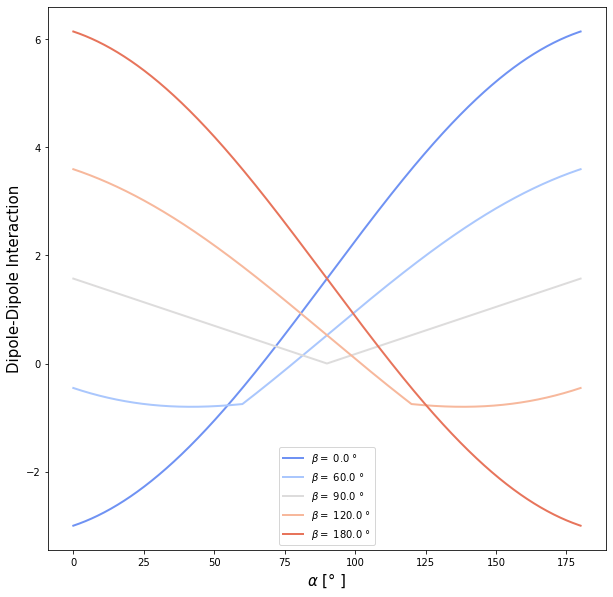

In [6]:
sns.set_palette('coolwarm',5)
def dipole_potential(R,alpha,beta):
    U = -(3*np.cos(alpha)*np.cos(beta) - np.abs(alpha-beta))/np.power(R,3) 
    return U 

# potential simplified as we assume that r=(1,0,0) and norm of m1 and m1 = 1 
# and  m1,m2 in 0,pi 
R=1
alpha = np.linspace(0,180*np.pi/np.pi,1000)
print(beta)
fig,ax = plt.subplots(figsize=(10,10))
for beta in np.array([0,60,90,120,180])*np.pi/180:
    alpha_r = alpha*np.pi/180
    U = dipole_potential(R,alpha_r,beta)
    ax.plot(alpha,U,
            lw=2,
            label="$\\beta = $ {} $\degree$".format(np.round(beta*180/np.pi,1)))

plt.ylabel("Dipole-Dipole Interaction",size=15)
plt.xlabel("$\\alpha$ [$\degree$ ]",size=15)
plt.legend()
plt.show()